# Importing the libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
fraudulent = pd.read_csv(r"C:\Users\Fraud.csv")
fraudulent

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
fraudulent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
fraudulent.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
fraudulent['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [6]:
fraudulent['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [7]:
fraudulent['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

# Target Imbalance

<AxesSubplot:>

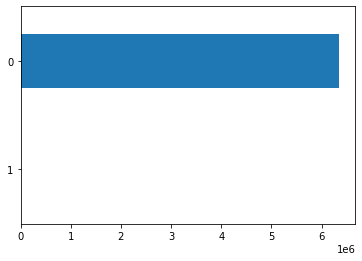

In [8]:
fraudulent.isFraud.value_counts().sort_values().plot(kind = 'barh')

## Visualisng Null Values

Text(0.5, 1.0, 'Total Missing Values')

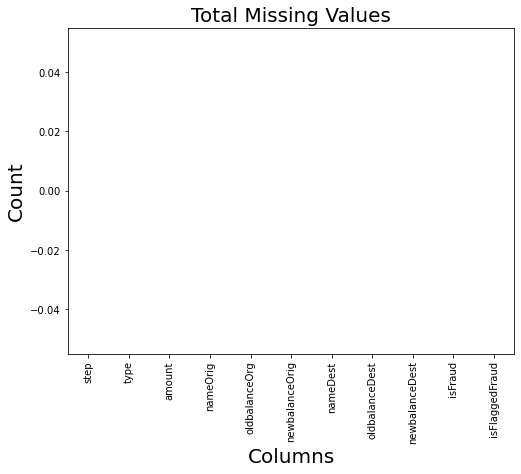

In [9]:
total = fraudulent.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [10]:
#As we can clearly see there is no null values in our datatset

# Checking and resolving outliers

## Seeing the skewness of the column

In [11]:
### The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness
### is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0.


In [12]:
print("Skewness: %f" % fraudulent['step'].skew())

Skewness: 0.375177


In [13]:
print("Skewness: %f" % fraudulent['amount'].skew())

Skewness: 30.993949


In [14]:
print("Skewness: %f" % fraudulent['oldbalanceOrg'].skew())

Skewness: 5.249136


In [15]:
print("Skewness: %f" % fraudulent['newbalanceOrig'].skew())

Skewness: 5.176884


In [16]:
print("Skewness: %f" % fraudulent['oldbalanceDest'].skew())

Skewness: 19.921758


In [17]:
print("Skewness: %f" % fraudulent['newbalanceDest'].skew())

Skewness: 19.352302


In [18]:
print("Skewness: %f" % fraudulent['isFlaggedFraud'].skew())

Skewness: 630.603629


## As we can clearly see that except the step column all other numerical cloumns are highly skewed

## So, in that case we will use extreme oultliers(3 standard deviation) in every columns except the step column

## Visualising the kind of distribution using histogram and outliers using boxplot for every numerical column respectively

Text(0, 0.5, 'isFraud')

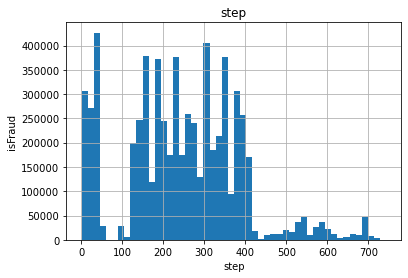

In [19]:
figure_1=fraudulent.step.hist(bins=50)
figure_1.set_title('step')
figure_1.set_xlabel('step')
figure_1.set_ylabel('isFraud')

<AxesSubplot:>

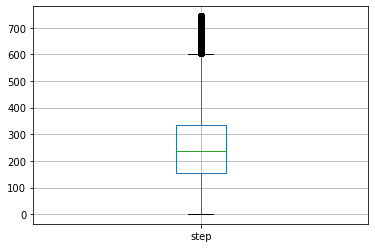

In [20]:
fraudulent.boxplot(column='step')

Text(0, 0.5, 'isFraud')

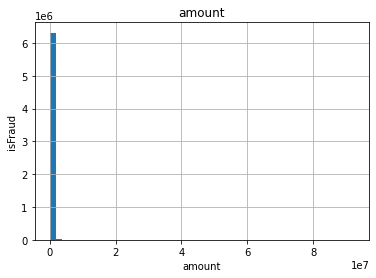

In [21]:
figure_2=fraudulent.amount.hist(bins=50)
figure_2.set_title('amount')
figure_2.set_xlabel('amount')
figure_2.set_ylabel('isFraud')

<AxesSubplot:>

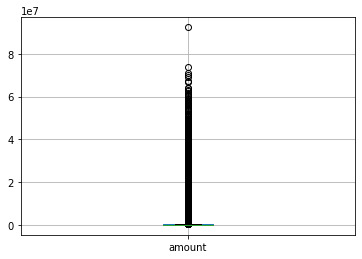

In [22]:
fraudulent.boxplot(column='amount')

Text(0, 0.5, 'isFraud')

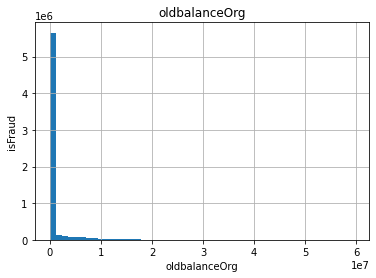

In [23]:
figure_3=fraudulent.oldbalanceOrg.hist(bins=50)
figure_3.set_title('oldbalanceOrg')
figure_3.set_xlabel('oldbalanceOrg')
figure_3.set_ylabel('isFraud')

<AxesSubplot:>

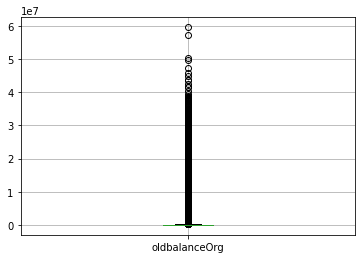

In [24]:
fraudulent.boxplot(column='oldbalanceOrg')

Text(0, 0.5, 'isFraud')

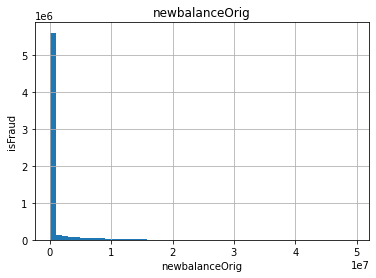

In [25]:
figure_4=fraudulent.newbalanceOrig.hist(bins=50)
figure_4.set_title('newbalanceOrig')
figure_4.set_xlabel('newbalanceOrig')
figure_4.set_ylabel('isFraud')

<AxesSubplot:>

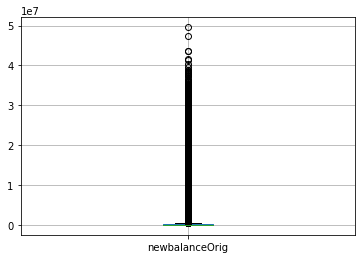

In [26]:
fraudulent.boxplot(column='newbalanceOrig')

Text(0, 0.5, 'isFraud')

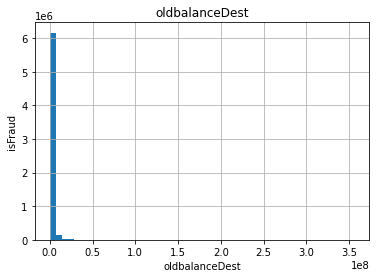

In [27]:
figure_5=fraudulent.oldbalanceDest.hist(bins=50)
figure_5.set_title('oldbalanceDest')
figure_5.set_xlabel('oldbalanceDest')
figure_5.set_ylabel('isFraud')

<AxesSubplot:>

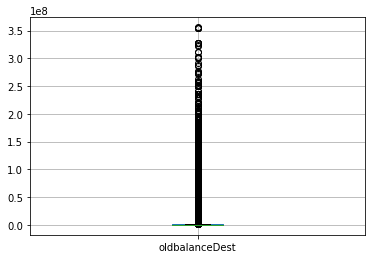

In [28]:
fraudulent.boxplot(column='oldbalanceDest')

Text(0, 0.5, 'isFraud')

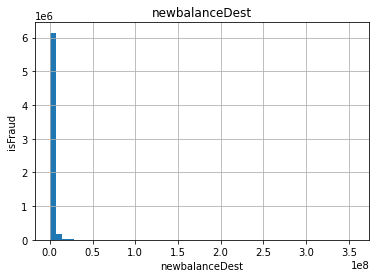

In [29]:
figure_6=fraudulent.newbalanceDest.hist(bins=50)
figure_6.set_title('newbalanceDest')
figure_6.set_xlabel('newbalanceDest')
figure_6.set_ylabel('isFraud')

<AxesSubplot:>

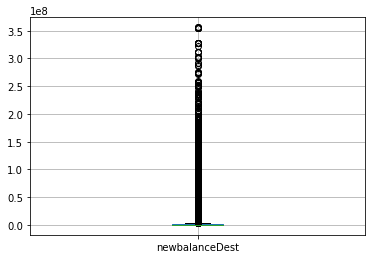

In [30]:
fraudulent.boxplot(column='newbalanceDest')

Text(0, 0.5, 'isFraud')

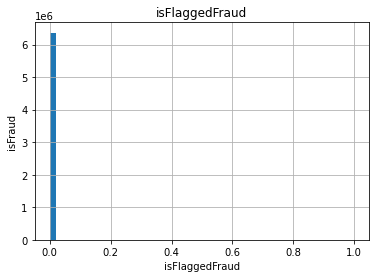

In [31]:
figure_7=fraudulent.isFlaggedFraud.hist(bins=50)
figure_7.set_title('isFlaggedFraud')
figure_7.set_xlabel('isFlaggedFraud')
figure_7.set_ylabel('isFraud')

<AxesSubplot:>

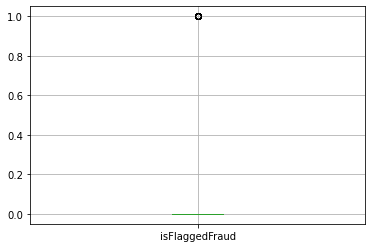

In [32]:
fraudulent.boxplot(column='isFlaggedFraud')

## Resolving the outliers in step column

In [33]:
fraudulent['step'].describe()

count    6.362620e+06
mean     2.433972e+02
std      1.423320e+02
min      1.000000e+00
25%      1.560000e+02
50%      2.390000e+02
75%      3.350000e+02
max      7.430000e+02
Name: step, dtype: float64

In [34]:
fraudulent['step'].mean()

243.39724563151657

In [35]:
fraudulent['step'].max()

743

In [36]:
##### Assuming step follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundary=fraudulent['step'].mean() + 3* fraudulent['step'].std()
lower_boundary=fraudulent['step'].mean() - 3* fraudulent['step'].std()
print(lower_boundary), print(upper_boundary),print(fraudulent['step'].mean())

-183.59866751590442
670.3931587789375
243.39724563151657


(None, None, None)

## Resolving the outliers in amount column

In [37]:
fraudulent['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [38]:
fraudulent['amount'].max()

92445516.64

In [39]:
fraudulent['amount'].mean()

179861.90354912292

In [40]:
iqr_1 = fraudulent.amount.quantile(0.75)-fraudulent.amount.quantile(0.25)
iqr_1

195331.9075

In [41]:
### Extreme outliers
lower_bridge_1=fraudulent['amount'].quantile(0.25)-(iqr_1*3)
upper_bridge_1=fraudulent['amount'].quantile(0.75)+(iqr_1*3)
print(lower_bridge_1), print(upper_bridge_1)


-572606.1525000001
794717.2000000001


(None, None)

## Resolving the outliers in oldbalanceOrg column

In [42]:
fraudulent['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [43]:
fraudulent['oldbalanceOrg'].mean()

833883.1040744851

In [44]:
fraudulent['oldbalanceOrg'].max()

59585040.37

In [45]:
iqr_2 = fraudulent.oldbalanceOrg.quantile(0.75)-fraudulent.oldbalanceOrg.quantile(0.25)
iqr_2

107315.175

In [46]:
### Extreme outliers
lower_bridge_2=fraudulent['oldbalanceOrg'].quantile(0.25)-(iqr_2*3)
upper_bridge_2=fraudulent['oldbalanceOrg'].quantile(0.75)+(iqr_2*3)
print(lower_bridge_2), print(upper_bridge_2)


-321945.525
429260.7


(None, None)

## Resolving the outliers in newbalanceOrig column

In [47]:
fraudulent['newbalanceOrig'].describe()

count    6.362620e+06
mean     8.551137e+05
std      2.924049e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.442584e+05
max      4.958504e+07
Name: newbalanceOrig, dtype: float64

In [48]:
fraudulent['newbalanceOrig'].mean()

855113.6685785672

In [49]:
fraudulent['newbalanceOrig'].max()

49585040.37

In [50]:
iqr_3 = fraudulent.newbalanceOrig.quantile(0.75)-fraudulent.newbalanceOrig.quantile(0.25)
iqr_3

144258.41

In [51]:
### Extreme outliers
lower_bridge_3=fraudulent['newbalanceOrig'].quantile(0.25)-(iqr_3*3)
upper_bridge_3=fraudulent['newbalanceOrig'].quantile(0.75)+(iqr_3*3)
print(lower_bridge_3), print(upper_bridge_3)


-432775.23
577033.64


(None, None)

## Resolving the outliers in oldbalanceDest column

In [52]:
fraudulent['oldbalanceDest'].describe()

count    6.362620e+06
mean     1.100702e+06
std      3.399180e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.327057e+05
75%      9.430367e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64

In [53]:
fraudulent['oldbalanceDest'].mean()

1100701.6665196999

In [54]:
fraudulent['oldbalanceDest'].max()

356015889.35

In [55]:
iqr_4 = fraudulent.oldbalanceDest.quantile(0.75)-fraudulent.oldbalanceDest.quantile(0.25)
iqr_4

943036.7075

In [56]:
### Extreme outliers
lower_bridge_4=fraudulent['oldbalanceDest'].quantile(0.25)-(iqr_4*3)
upper_bridge_4=fraudulent['oldbalanceDest'].quantile(0.75)+(iqr_4*3)
print(lower_bridge_4), print(upper_bridge_4)


-2829110.1225
3772146.83


(None, None)

## Resolving the outliers in newbalanceDest column

In [57]:
fraudulent['newbalanceDest'].describe()

count    6.362620e+06
mean     1.224996e+06
std      3.674129e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.146614e+05
75%      1.111909e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64

In [58]:
fraudulent['newbalanceDest'].mean()

1224996.3982020712

In [59]:
fraudulent['newbalanceDest'].max()

356179278.92

In [60]:
iqr_5 = fraudulent.newbalanceDest.quantile(0.75)-fraudulent.newbalanceDest.quantile(0.25)
iqr_5

1111909.25

In [61]:
### Extreme outliers
lower_bridge_5=fraudulent['newbalanceDest'].quantile(0.25)-(iqr_5*3)
upper_bridge_5=fraudulent['newbalanceDest'].quantile(0.75)+(iqr_5*3)
print(lower_bridge_5), print(upper_bridge_5)


-3335727.75
4447637.0


(None, None)

In [62]:
data = fraudulent.copy()

# Removing  the outliers together

In [63]:
data = data[(data.oldbalanceOrg>upper_bridge_2)]
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
14,1,PAYMENT,4098.78,C1026483832,503264.00,499165.22,M1635378213,0.00,0.00,0,0
62,1,DEBIT,8727.74,C166694583,882770.00,874042.26,C1129670968,12636.00,0.00,0,0
63,1,PAYMENT,2599.46,C885910946,874042.26,871442.79,M1860591867,0.00,0.00,0,0
241,1,PAYMENT,4635.18,C1110698130,6313782.05,6309146.87,M125644421,0.00,0.00,0,0
242,1,PAYMENT,1267.97,C1053632127,6309146.87,6307878.90,M1493158871,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [64]:
fraud = data[(data.newbalanceOrig>upper_bridge_3)]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
62,1,DEBIT,8727.74,C166694583,882770.00,874042.26,C1129670968,12636.0,0.0,0,0
63,1,PAYMENT,2599.46,C885910946,874042.26,871442.79,M1860591867,0.0,0.0,0,0
241,1,PAYMENT,4635.18,C1110698130,6313782.05,6309146.87,M125644421,0.0,0.0,0,0
242,1,PAYMENT,1267.97,C1053632127,6309146.87,6307878.90,M1493158871,0.0,0.0,0,0
243,1,PAYMENT,6911.99,C89509666,6307878.90,6300966.92,M1806880779,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.0,1,0
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.0,1,0
6362582,741,TRANSFER,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.0,0.0,1,0


In [65]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
62,1,DEBIT,8727.74,C166694583,882770.00,874042.26,C1129670968,12636.0,0.0,0,0
63,1,PAYMENT,2599.46,C885910946,874042.26,871442.79,M1860591867,0.0,0.0,0,0
241,1,PAYMENT,4635.18,C1110698130,6313782.05,6309146.87,M125644421,0.0,0.0,0,0
242,1,PAYMENT,1267.97,C1053632127,6309146.87,6307878.90,M1493158871,0.0,0.0,0,0
243,1,PAYMENT,6911.99,C89509666,6307878.90,6300966.92,M1806880779,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.0,1,0
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.0,1,0
6362582,741,TRANSFER,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.0,0.0,1,0


## Now ate dataset is somewhat free from the outliers. Next we will work on categorical columns

In [66]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843823 entries, 62 to 6362584
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            843823 non-null  int64  
 1   type            843823 non-null  object 
 2   amount          843823 non-null  float64
 3   nameOrig        843823 non-null  object 
 4   oldbalanceOrg   843823 non-null  float64
 5   newbalanceOrig  843823 non-null  float64
 6   nameDest        843823 non-null  object 
 7   oldbalanceDest  843823 non-null  float64
 8   newbalanceDest  843823 non-null  float64
 9   isFraud         843823 non-null  int64  
 10  isFlaggedFraud  843823 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 77.3+ MB


In [67]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [68]:
fraud['type'].value_counts()

CASH_IN     798245
PAYMENT      32750
CASH_OUT     10931
TRANSFER      1302
DEBIT          595
Name: type, dtype: int64

In [69]:
fraud['nameOrig'].value_counts()

C731708421     2
C1378263697    2
C1708201912    2
C556364753     2
C1254512194    2
              ..
C1981657128    1
C241959558     1
C1499880081    1
C1692451315    1
C992223106     1
Name: nameOrig, Length: 843674, dtype: int64

In [70]:
fraud['nameDest'].value_counts()

C985934102     40
C392292416     36
C1590550415    36
C1782113663    34
C1899073220    34
               ..
C557640230      1
C805578664      1
C796421264      1
C1186108751     1
C1366804249     1
Name: nameDest, Length: 342997, dtype: int64

## Applying one hot encoding

In [71]:
fraud = pd.get_dummies(data=fraud, columns = ['type'])

In [72]:
fraud

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
62,1,8727.74,C166694583,882770.00,874042.26,C1129670968,12636.0,0.0,0,0,0,0,1,0,0
63,1,2599.46,C885910946,874042.26,871442.79,M1860591867,0.0,0.0,0,0,0,0,0,1,0
241,1,4635.18,C1110698130,6313782.05,6309146.87,M125644421,0.0,0.0,0,0,0,0,0,1,0
242,1,1267.97,C1053632127,6309146.87,6307878.90,M1493158871,0.0,0.0,0,0,0,0,0,1,0
243,1,6911.99,C89509666,6307878.90,6300966.92,M1806880779,0.0,0.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362576,741,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0,0,0,0,0,1
6362578,741,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.0,1,0,0,0,0,0,1
6362580,741,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.0,1,0,0,0,0,0,1
6362582,741,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.0,0.0,1,0,0,0,0,0,1


## Applying Label Encoding

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [74]:
label_encode_column = ['nameOrig', 'nameDest']

In [75]:
fraud = fraud.apply(LabelEncoder().fit_transform)

In [76]:
fraud

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
62,0,40357,291397,90255,69438,20804,1567,0,0,0,0,0,1,0,0
63,0,12238,794260,88742,68957,324843,0,0,0,0,0,0,0,1,0
241,0,21981,48298,552573,544018,314648,0,0,0,0,0,0,0,1,0
242,0,5936,23310,552310,543945,318619,0,0,0,0,0,0,0,1,0
243,0,32401,798183,552240,543526,323922,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362576,451,833134,748734,842709,843414,228818,0,0,1,0,0,0,0,0,1
6362578,451,833134,48751,842681,833292,302122,0,0,1,0,0,0,0,0,1
6362580,451,833134,795333,833044,775721,150814,0,0,1,0,0,0,0,0,1
6362582,451,833134,412544,776244,507295,250103,0,0,1,0,0,0,0,0,1


In [77]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843823 entries, 62 to 6362584
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   step            843823 non-null  int64
 1   amount          843823 non-null  int64
 2   nameOrig        843823 non-null  int32
 3   oldbalanceOrg   843823 non-null  int64
 4   newbalanceOrig  843823 non-null  int64
 5   nameDest        843823 non-null  int32
 6   oldbalanceDest  843823 non-null  int64
 7   newbalanceDest  843823 non-null  int64
 8   isFraud         843823 non-null  int64
 9   isFlaggedFraud  843823 non-null  int64
 10  type_CASH_IN    843823 non-null  int64
 11  type_CASH_OUT   843823 non-null  int64
 12  type_DEBIT      843823 non-null  int64
 13  type_PAYMENT    843823 non-null  int64
 14  type_TRANSFER   843823 non-null  int64
dtypes: int32(2), int64(13)
memory usage: 96.6 MB


## Visualising Null Values

Text(0.5, 1.0, 'Total Missing Values')

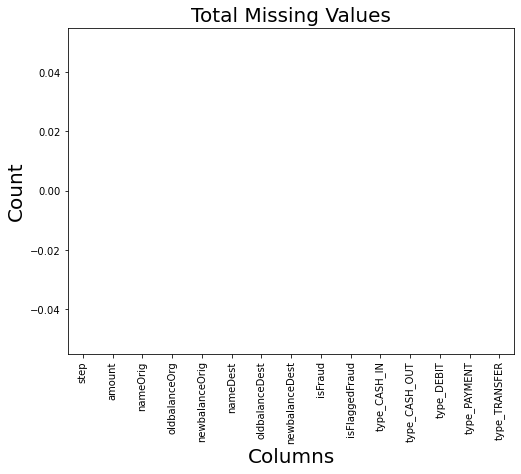

In [78]:
total = fraud.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [79]:
 ### As we can clearly see there is no null values in our datatset

## Visualisng correlations using heat map

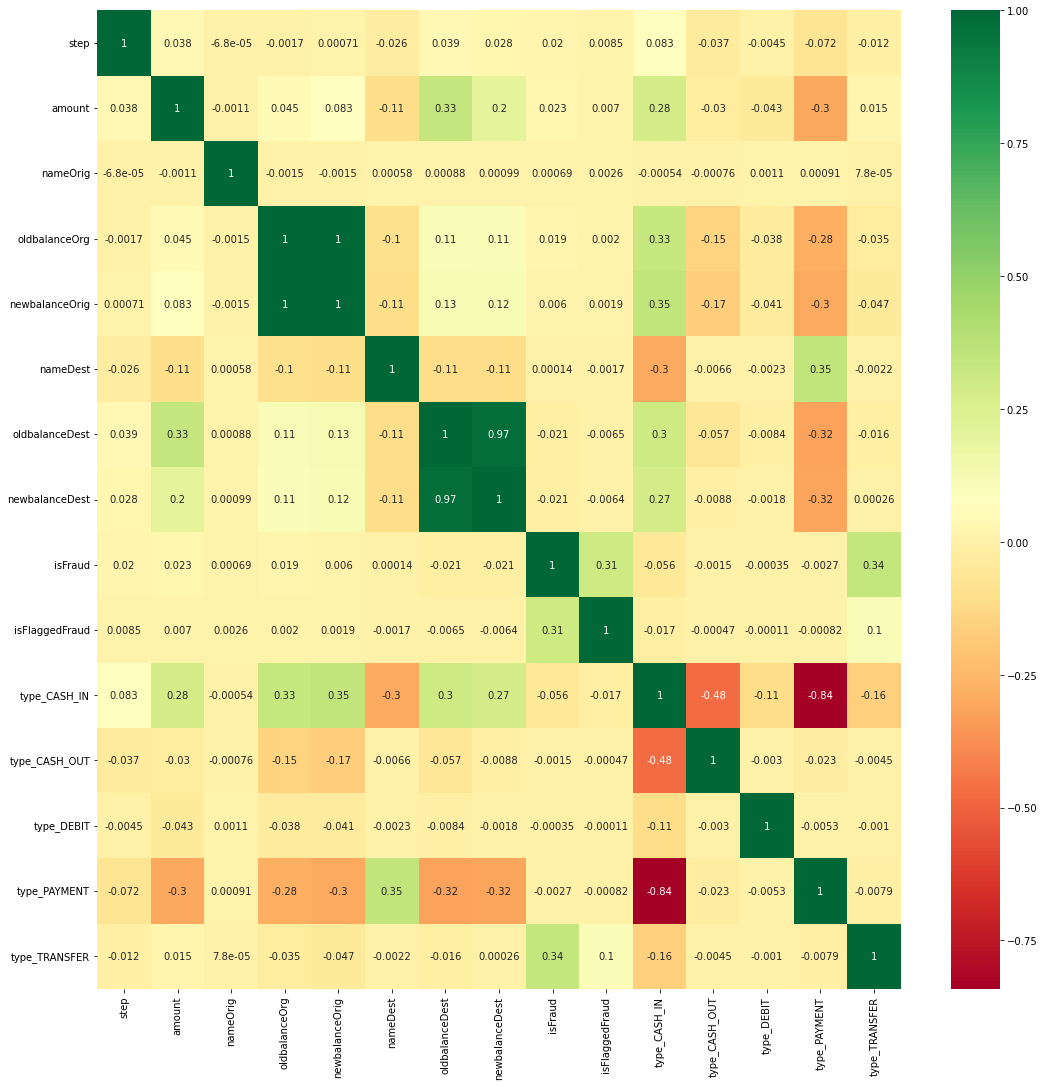

In [80]:
plt.figure(figsize=(18,18))
sns.heatmap(fraud.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [81]:
### From the heatmap above, extreme green means highly positively correlated features 
### (relationship between two variables in which both variables move in the same direction), 
### extreme red means negatively correlated features (relationship between two variables in which an increase in one 
###variable is associated with a decrease in the other).

In [82]:
features = fraud.corr()['isFraud'].sort_values()
features

type_CASH_IN     -0.055802
oldbalanceDest   -0.021125
newbalanceDest   -0.020952
type_PAYMENT     -0.002679
type_CASH_OUT    -0.001528
type_DEBIT       -0.000354
nameDest          0.000135
nameOrig          0.000690
newbalanceOrig    0.005975
oldbalanceOrg     0.018842
step              0.020024
amount            0.023150
isFlaggedFraud    0.305480
type_TRANSFER     0.339190
isFraud           1.000000
Name: isFraud, dtype: float64

## Plotting correlation coefficient for easy visualization

<AxesSubplot:>

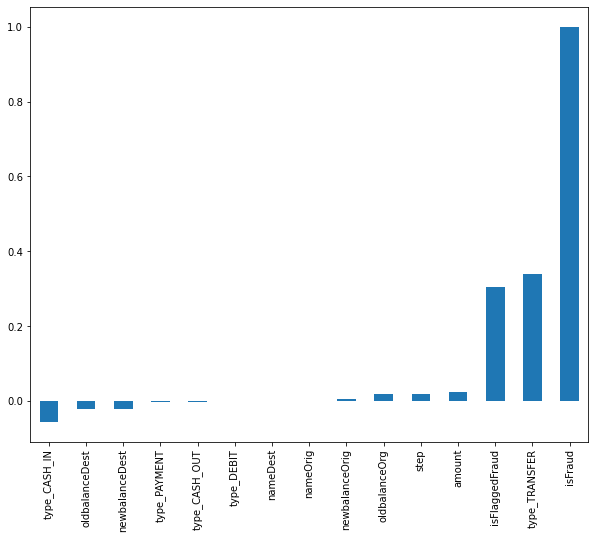

In [83]:
features.plot(kind='bar',figsize=(10,8))

# Creating are Dependent and Independent variables

In [84]:
X = fraud[[ 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFlaggedFraud', 'nameDest', 'nameOrig', 'type_TRANSFER']]
Y = fraud[['isFraud']]

In [85]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,isFlaggedFraud,nameDest,nameOrig,type_TRANSFER
62,0,40357,90255,69438,0,20804,291397,0
63,0,12238,88742,68957,0,324843,794260,0
241,0,21981,552573,544018,0,314648,48298,0
242,0,5936,552310,543945,0,318619,23310,0
243,0,32401,552240,543526,0,323922,798183,0
...,...,...,...,...,...,...,...,...
6362576,451,833134,842709,843414,0,228818,748734,1
6362578,451,833134,842681,833292,0,302122,48751,1
6362580,451,833134,833044,775721,0,150814,795333,1
6362582,451,833134,776244,507295,0,250103,412544,1


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

## Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, :-1] = sc.fit_transform(X_train.iloc[:, :-1])
X_test.iloc[:, :-1] = sc.transform(X_test.iloc[:, :-1])

## No need to apply feature scaling on dummy variable

## Applying XGBoost Classifier

In [88]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [89]:
y_pred = classifier.predict(X_test)

## Creating confusion matrix and predicting precision and recall 

In [90]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(Precision)
print(Recall)

[[168733      0]
 [     0     32]]
1.0
1.0


##  Predicting accuracy and f1_score

In [91]:
from sklearn.metrics import  accuracy_score, f1_score
Accuracy = accuracy_score(y_test, y_pred)
print(Accuracy)
F1_score = f1_score(y_test, y_pred)
print(F1_score)

1.0
1.0


In [92]:
classifier.score(X_train, y_train)

0.9999970372916105

## Applying k-Fold Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


# Building the ANN

## initializing the ANN 

In [94]:
ann = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer

In [95]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding the second hidden layer

In [96]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding the output layer

In [97]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Compiling the ANN

In [98]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [99]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
21096/21096 [==============================] - 22s 1ms/step - loss: 0.0064 - accuracy: 0.9997
Epoch 2/10
21096/21096 [==============================] - 21s 1ms/step - loss: 1.2867e-04 - accuracy: 1.0000
Epoch 3/10
21096/21096 [==============================] - 22s 1ms/step - loss: 3.9770e-05 - accuracy: 1.0000
Epoch 4/10
21096/21096 [==============================] - 21s 1ms/step - loss: 3.5059e-05 - accuracy: 1.0000
Epoch 5/10
21096/21096 [==============================] - 21s 1ms/step - loss: 3.2909e-05 - accuracy: 1.0000
Epoch 6/10
21096/21096 [==============================] - 21s 1ms/step - loss: 2.4899e-05 - accuracy: 1.0000
Epoch 7/10
21096/21096 [==============================] - 21s 1ms/step - loss: 3.5622e-05 - accuracy: 1.0000
Epoch 8/10
21096/21096 [==============================] - 21s 996us/step - loss: 3.0930e-05 - accuracy: 1.0000
Epoch 9/10
21096/21096 [==============================] - 20s 971us/step - loss: 3.1859e-05 - accuracy: 1.0000
Epoch 10/10
21096/2

## Predicting the Test set results

In [100]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)

5274/5274 [==============================] - 4s 733us/step


## Creating confusion matrix and calculating accuracy

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[168733      0]
 [     0     32]]


1.0